#### **1. 온라인 쇼핑 트렌드 분석**
##### 오프라인 쇼핑보다 온라인 쇼핑의 사용량이 높아짐과 동시에 **방대한 쇼핑데이터들**이 생겨나고 있음. EDA를 통해 **추후의 판매량을 예측**할 수 있을 뿐더러 구매날짜, 구매정보 등 여러 데이터를 분석하여 이를 판매전략에 잘 접목시킨다면 **더 경쟁력있는 온라인 쇼핑몰**이 될 거라 생각함.
##### 참고할 쇼핑데이터는 [다음 주소][1]에서 확인할 수 있음.
[1]:https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset

#### **2. 따릉이 데이터 EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config lnlineBackend.figure_format = 'retina' #선명하게 만들기

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/sim/Desktop/비어플/2주차/과제/SeoulBikeData.csv', encoding="cp949") #인코딩 설정
data
#열 14개, 행 8760개

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Date : 날짜 
Rented Bike Count : 
대여 따릉이 수 
Hour : 시간 
Temperature : 기온 
Humidity(%) : 습도 
Wind Speed(m/s) : 풍속 
Visibility(10m) : 가시거리 
Dew point Temperature : 이슬점 온도 
Solar Radiation(MJ/m2) : 일사량 
Rainfall(mm) : 강우량 
Snowfall(cm) : 적설량 
Seasons : 계절 
Holiday : 공휴일 
Functioning Day : 운영날

In [3]:
data.head() 

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
data.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [7]:
data.isna().sum(axis=0).sort_values() #결측치 개수 오름차순 정렬 #결측치 재확인

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [8]:
data.describe() #기술통계량 확인

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
data[data.duplicated()] #중복행 확인 #중복행 없음

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


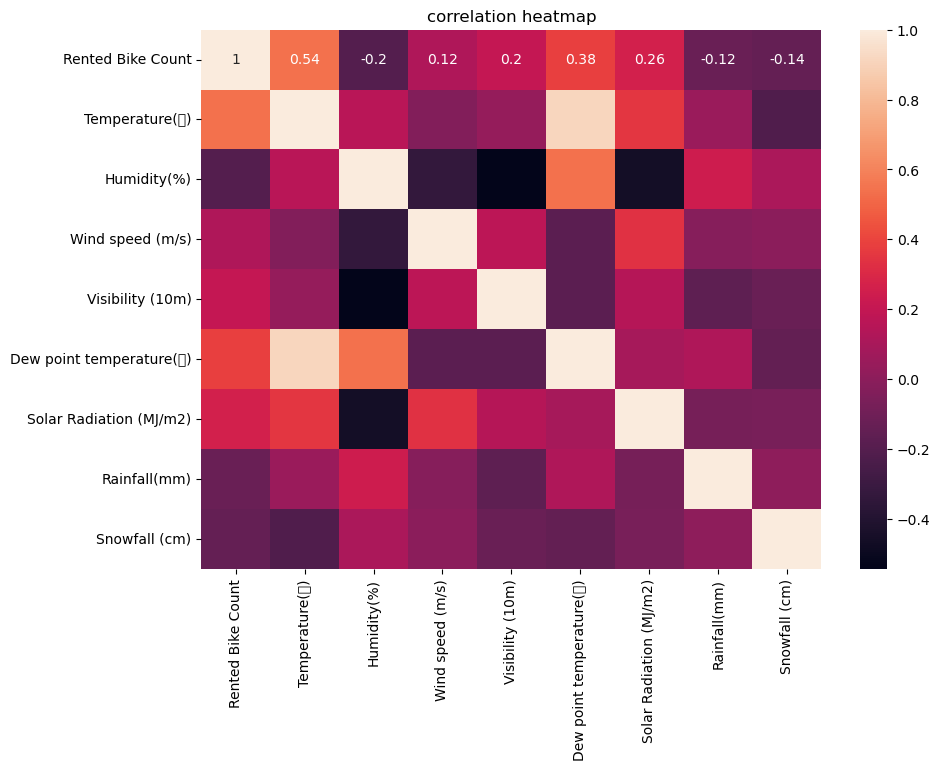

In [10]:
#data2 지정
data2 = data[['Rented Bike Count','Temperature(캜)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(캜)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
plt.figure(figsize=(10,7))
sns.heatmap(data2.corr(), annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵
#Rented Bike Count와 Temperature가 0.54로 상관관계가 가장 높고, Wind Speed와 Rainfall이 0.12와 -0.12로 상관관계가 가장 낮음.

In [11]:
data2.corr()

,Rented Bike Count,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(캜),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(캜),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [12]:
data[['Rented Bike Count','Temperature(캜)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(캜)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]

,Rented Bike Count,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [13]:
data['Rented Bike Count'].value_counts() #종속변수(Rented Bike Count) 확인 -> 0회 295번, 122회 19번 등

Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

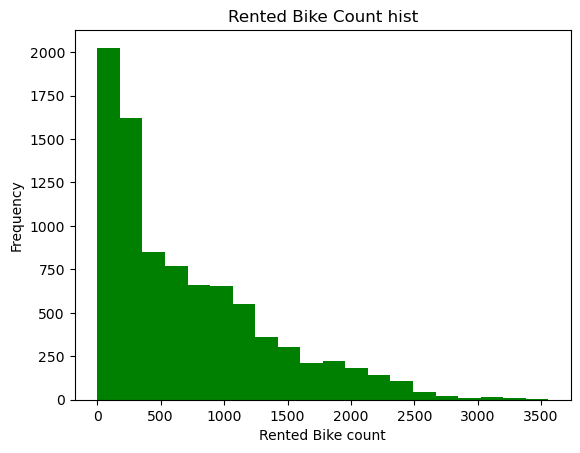

<Axes: title={'center': 'Rented Bike Count Box'}, ylabel='Frequency'>

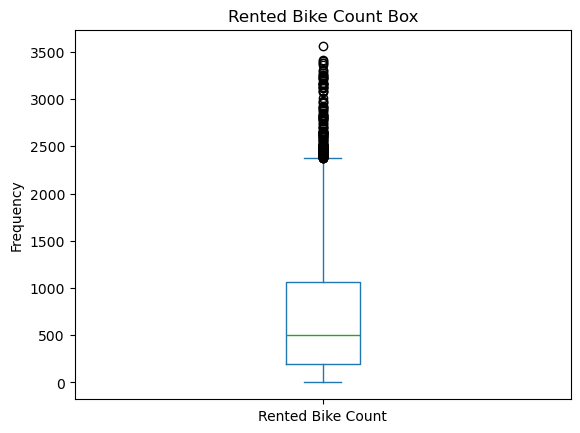

In [14]:
data['Rented Bike Count'].plot(kind='hist',bins=20, xlabel='Rented Bike count', title='Rented Bike Count hist',color='green')
plt.show()
data['Rented Bike Count'].plot(kind='box', ylabel='Frequency', title='Rented Bike Count Box')
# Rented Bike Count histogram과 Rented Bike Count Boxplot로 Rented Bike Count의 양상 파악

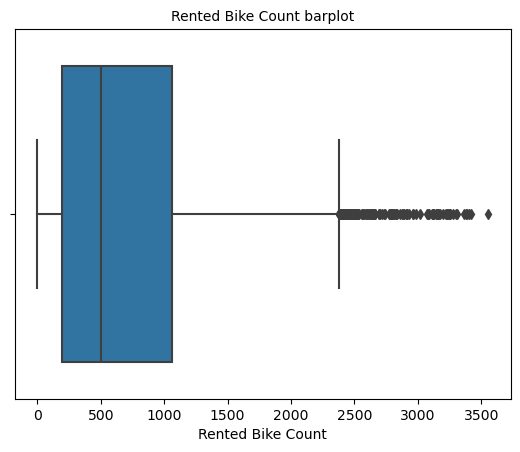

In [20]:
sns.boxplot(x='Rented Bike Count', data=data)
plt.title('Rented Bike Count barplot', fontsize=10)
plt.show()

Temperature(캜)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: count, Length: 546, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


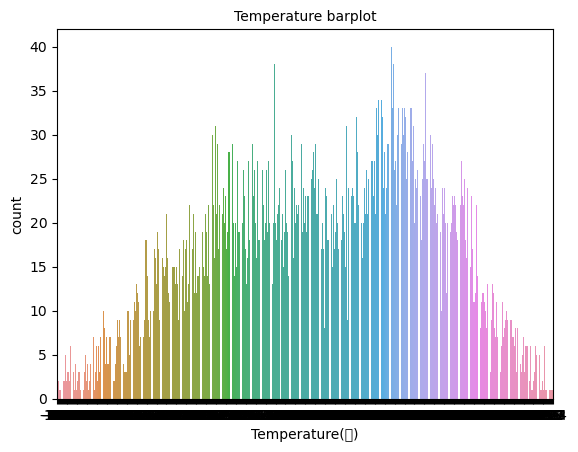

Temperature(캜)  Rented Bike Count
18.3            0                    6
16.7            0                    6
14.5            0                    5
10.8            0                    5
13.2            0                    5
                                    ..
6.7             507                  1
                487                  1
                474                  1
                467                  1
39.4            561                  1
Name: count, Length: 8537, dtype: int64
Temperature(캜)
-17.8     322.0
-17.5     145.5
-17.4      64.0
-16.9      36.0
-16.5      96.0
          ...  
 38.0    1184.0
 38.7     475.0
 39.0    1033.0
 39.3     531.0
 39.4     561.0
Name: Rented Bike Count, Length: 546, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


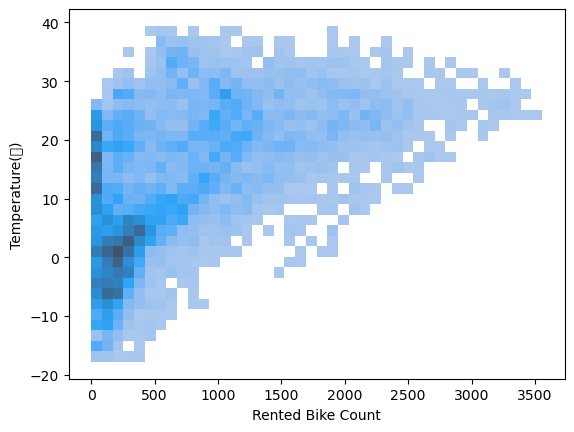

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


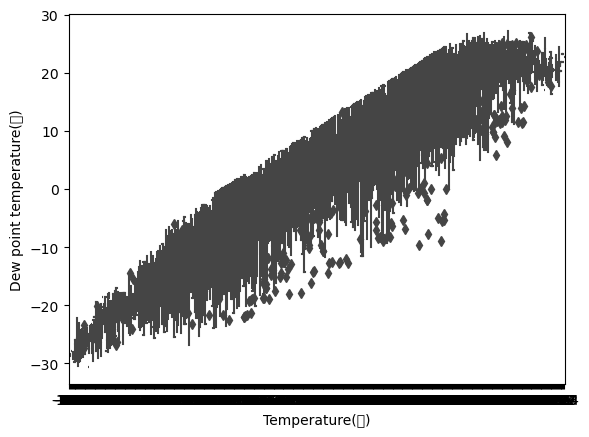

<Axes: xlabel='Temperature(캜)', ylabel='Seasons'>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


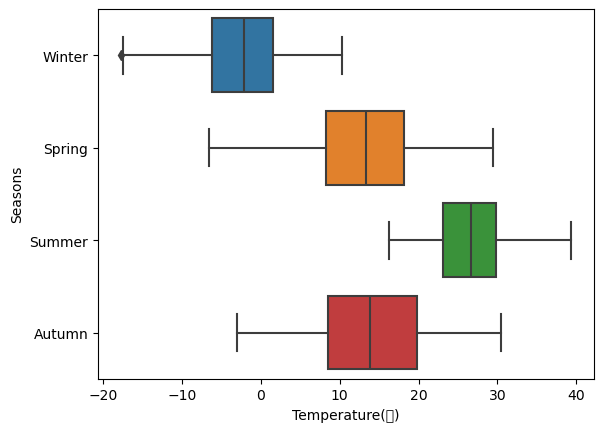

In [26]:
# Temperature(캜)
print(data2['Temperature(캜)'].value_counts())
# 시각화
sns.countplot(x='Temperature(캜)', data=data2)
plt.title('Temperature barplot', fontsize=10)
plt.show()
# 기온(Temperature)이 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
print(data2[['Temperature(캜)','Rented Bike Count']].value_counts())
print(data2.groupby('Temperature(캜)').mean()['Rented Bike Count'])
sns.histplot(x=data2['Rented Bike Count'], y=data2['Temperature(캜)'])
plt.show()
# 기온(Temperature)과 이슬점 온도(Dew point temperature)의 관계
sns.boxplot(x=data2['Temperature(캜)'], y=data2['Dew point temperature(캜)'])
plt.show()
# 기온(Temperature)과 계절(Seasons)의 관계
sns.boxplot(x=data['Temperature(캜)'], y=data['Seasons'])

In [28]:
print(sum(data.Seasons=='Winter'))
print(sum(data.Seasons=='Spring'))
print(sum(data.Seasons=='Summer'))
print(sum(data.Seasons=='Autumn')) 
#Winter 2160번, Spring 2208번, Summer 2208번, Autumn 2184번

2160
2208
2208
2184


Wind speed (m/s)
1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: count, Length: 65, dtype: int64


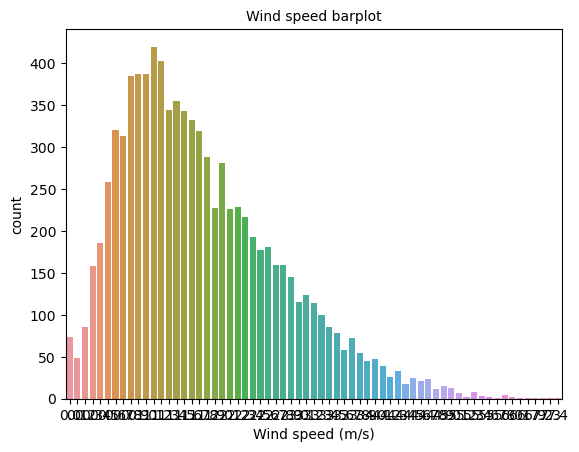

Wind speed (m/s)  Rented Bike Count
1.2               0                    15
1.1               0                    15
0.8               0                    14
1.6               0                    14
0.9               0                    13
                                       ..
1.2               891                   1
                  886                   1
                  885                   1
                  877                   1
7.4               913                   1
Name: count, Length: 7810, dtype: int64
Wind speed (m/s)
0.0     448.027027
0.1     591.040816
0.2     498.011628
0.3     454.867089
0.4     470.731183
          ...     
6.7     146.000000
6.9      49.000000
7.2    1805.000000
7.3     133.000000
7.4     913.000000
Name: Rented Bike Count, Length: 65, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


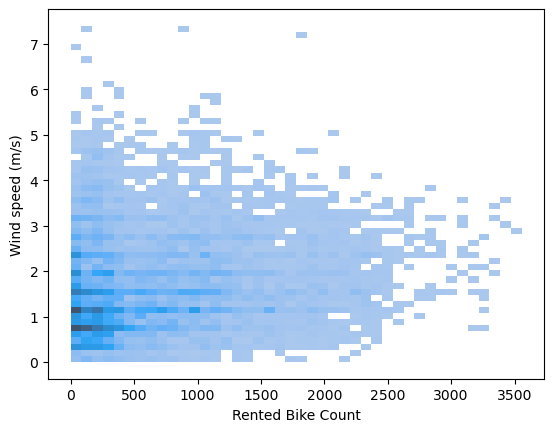

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


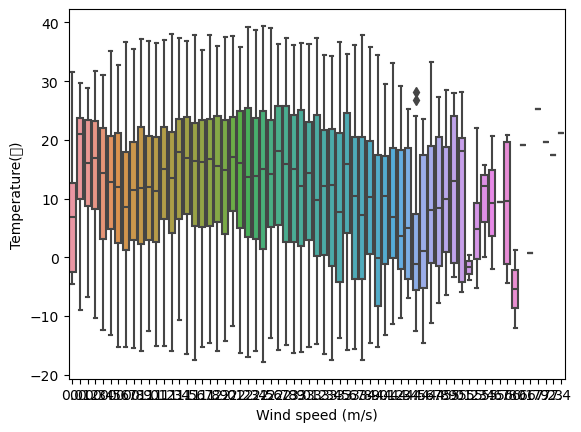

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


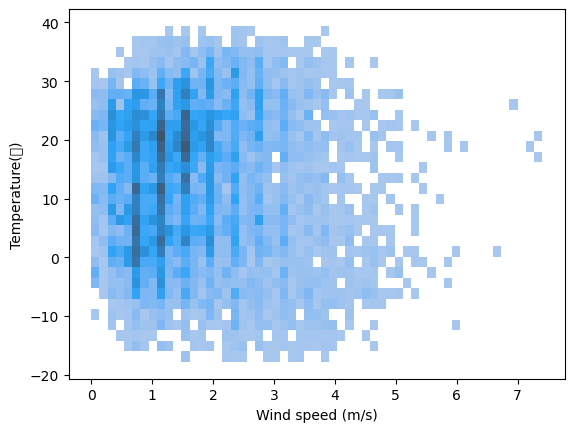

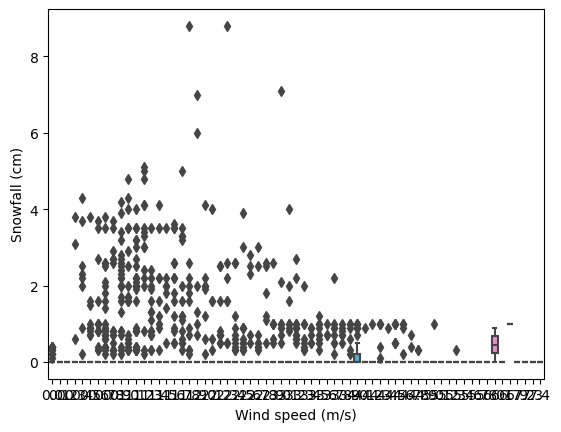

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


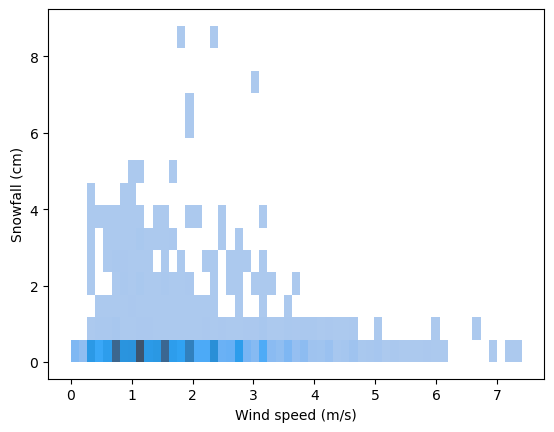

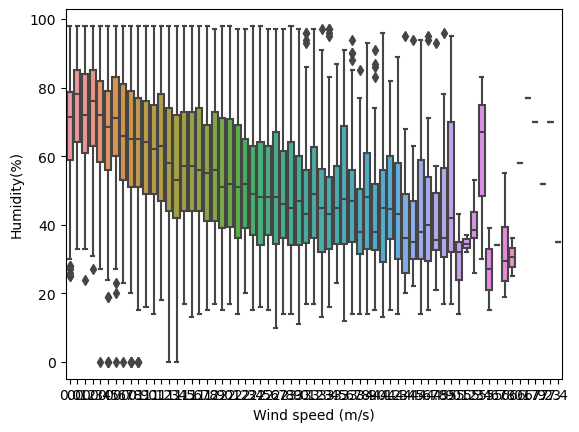

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind speed (m/s)', ylabel='Humidity(%)'>

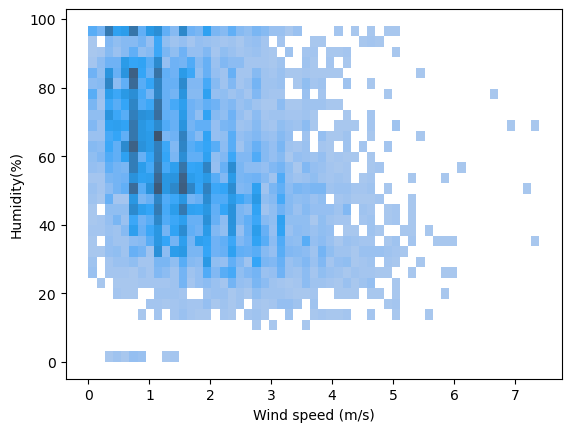

In [43]:
# Wind speed (m/s)
print(data2['Wind speed (m/s)'].value_counts())
# 시각화
plt.subplot(1, 1, 1)
sns.countplot(x='Wind speed (m/s)', data=data2)
plt.title('Wind speed barplot', fontsize=10)
plt.show()
# 풍속(Wind speed)이 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
plt.subplot(1, 1, 1)
print(data2[['Wind speed (m/s)','Rented Bike Count']].value_counts())
print(data2.groupby('Wind speed (m/s)').mean()['Rented Bike Count'])
sns.histplot(x=data2['Rented Bike Count'], y=data2['Wind speed (m/s)'])
plt.show()
# 풍속(Wind speed)과 기온(Temperature)의 관계
plt.subplot(1, 1, 1)
sns.boxplot(x=data2['Wind speed (m/s)'], y=data2['Temperature(캜)'])
plt.show()
plt.subplot(1, 1, 1)
sns.histplot(x=data['Wind speed (m/s)'], y=data['Temperature(캜)'])
plt.show()
# 풍속(Wind speed)과 적설량(Snowfall)의 관계 -> 가장 낮은 상관관계
plt.subplot(1, 1, 1)
sns.boxplot(x=data['Wind speed (m/s)'], y=data['Snowfall (cm)'])
plt.show()
plt.subplot(1, 1, 1)
sns.histplot(x=data['Wind speed (m/s)'], y=data['Snowfall (cm)'])
plt.show()
# 풍속(Wind speed)과 습도(Humidity)의 관계 -> 가장 높은 상관관계
plt.subplot(1, 1, 1)
sns.boxplot(x=data['Wind speed (m/s)'], y=data['Humidity(%)'])
plt.show()
plt.subplot(1, 1, 1)
sns.histplot(x=data['Wind speed (m/s)'], y=data['Humidity(%)'])

Rainfall(mm)
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: count, Length: 61, dtype: int64


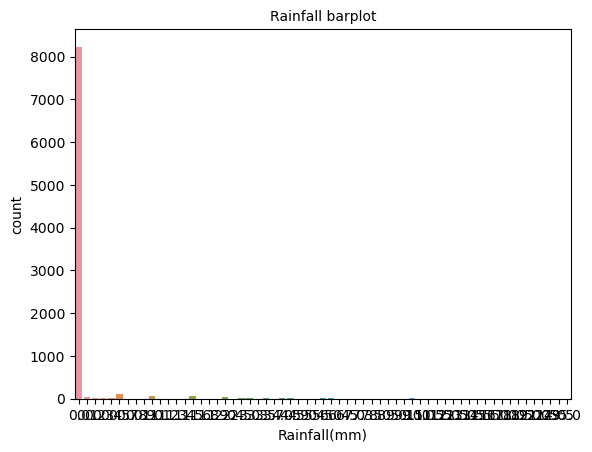

Rainfall(mm)  Rented Bike Count
0.0           0                    283
              262                   19
              223                   18
              165                   17
              103                   17
                                  ... 
              2088                   1
              2090                   1
              2091                   1
              2092                   1
35.0          151                    1
Name: count, Length: 2643, dtype: int64
Rainfall(mm)
0.0     739.311103
0.1     329.978261
0.2     185.300000
0.3     155.666667
0.4     134.187500
           ...    
21.0     19.000000
21.5    596.000000
24.0     61.000000
29.5    122.000000
35.0    151.000000
Name: Rented Bike Count, Length: 61, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


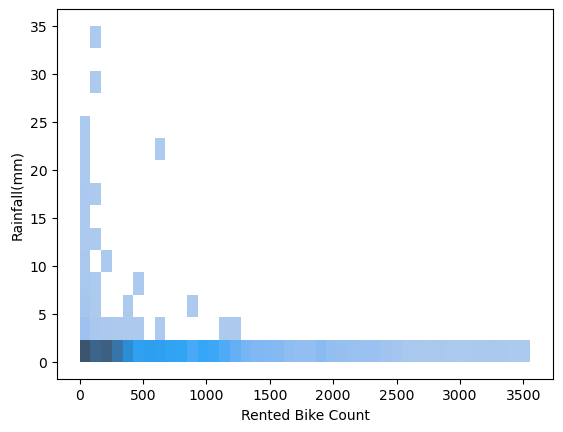

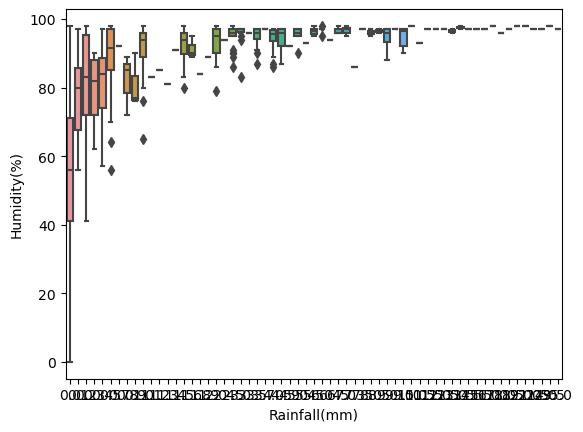

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


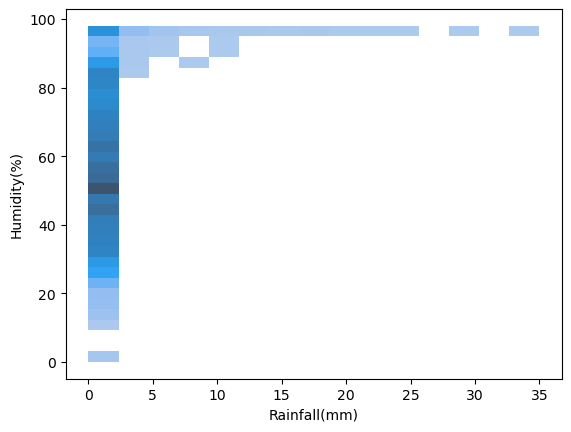

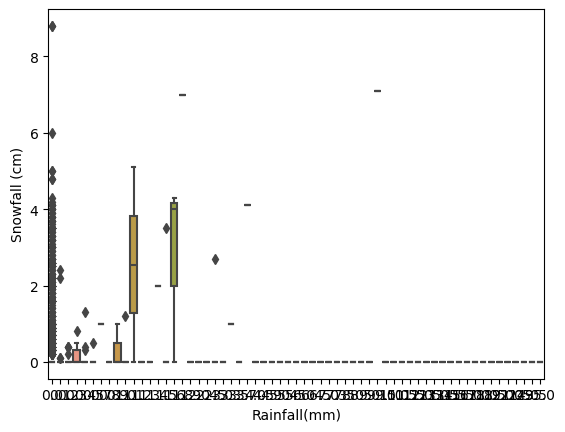

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rainfall(mm)', ylabel='Snowfall (cm)'>

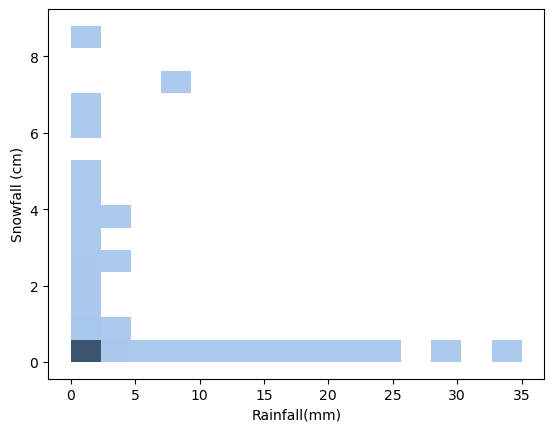

In [46]:
# Rainfall(mm)
print(data2['Rainfall(mm)'].value_counts())
# 시각화
sns.countplot(x='Rainfall(mm)', data=data2)
plt.title('Rainfall barplot', fontsize=10)
plt.show()
# 강우량(Rainfall)이 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
print(data2[['Rainfall(mm)','Rented Bike Count']].value_counts())
print(data2.groupby('Rainfall(mm)').mean()['Rented Bike Count'])
sns.histplot(x=data2['Rented Bike Count'], y=data2['Rainfall(mm)'])
plt.show()
# 강우량(Rainfall)과 습도(Humidity)의 관계 -> 가장 높은 상관관계
sns.boxplot(x=data2['Rainfall(mm)'], y=data2['Humidity(%)'])
plt.show()
sns.histplot(x=data['Rainfall(mm)'], y=data['Humidity(%)'])
plt.show()
# 강우량(Rainfall) 적설량(Snowfall)의 관계 -> 가장 낮은 상관관계
sns.boxplot(x=data['Rainfall(mm)'], y=data['Snowfall (cm)'])
plt.show()
sns.histplot(x=data['Rainfall(mm)'], y=data['Snowfall (cm)'])

Visibility (10m)
2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: count, Length: 1789, dtype: int64


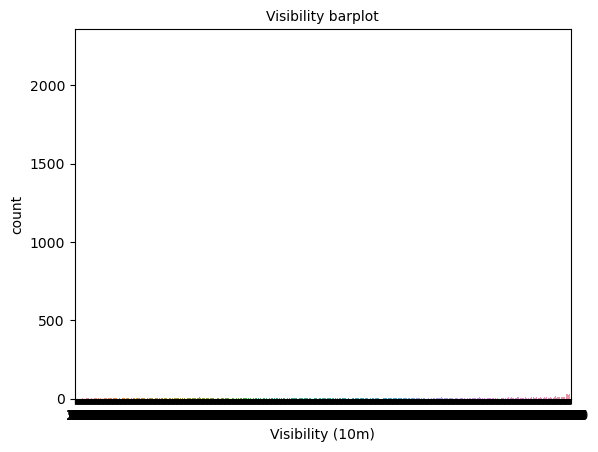

Visibility (10m)  Rented Bike Count
2000              0                    95
                  262                   9
                  273                   8
                  223                   7
                  165                   7
                                       ..
1084              1863                  1
                  443                   1
                  421                   1
                  318                   1
2000              3404                  1
Name: count, Length: 7806, dtype: int64
Visibility (10m)
27       83.000000
33       33.000000
34       24.000000
38       98.000000
53       65.000000
           ...    
1996    723.962963
1997    832.909091
1998    780.720000
1999    659.500000
2000    818.124722
Name: Rented Bike Count, Length: 1789, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


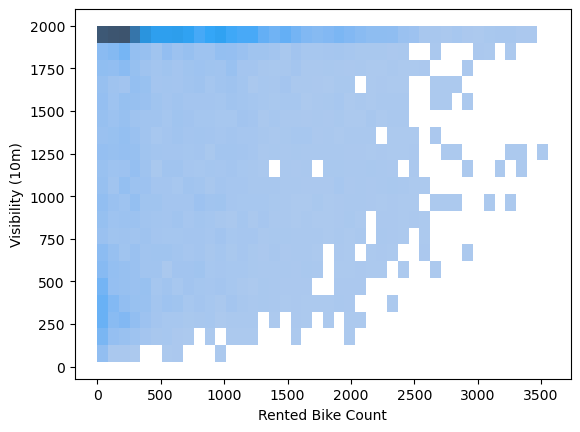

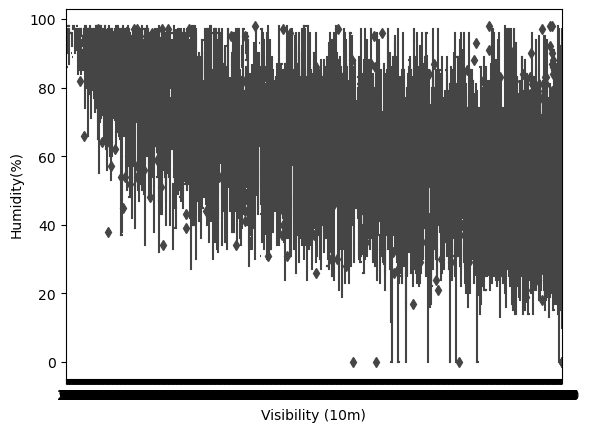

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


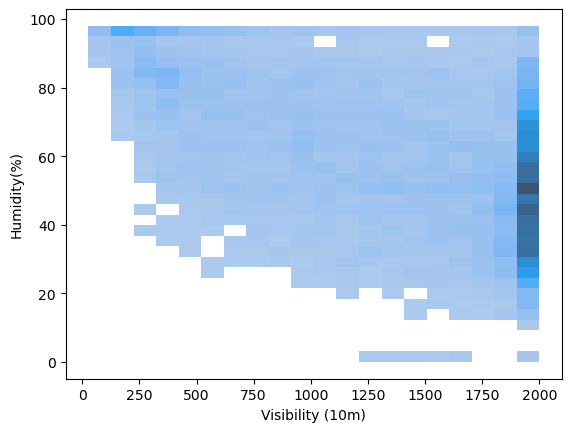

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


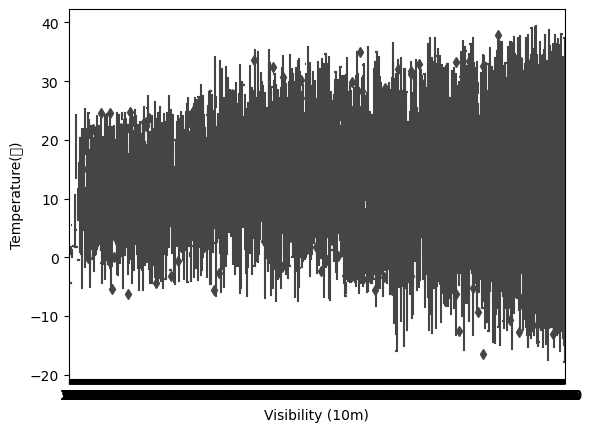

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Visibility (10m)', ylabel='Temperature(캜)'>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


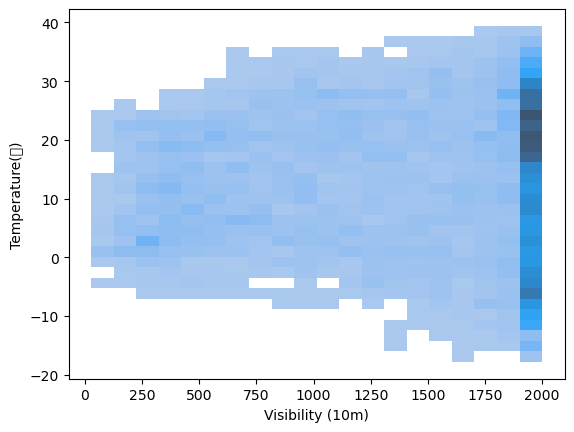

In [47]:
# Visibility (10m)
print(data2['Visibility (10m)'].value_counts())
# 시각화
sns.countplot(x='Visibility (10m)', data=data2)
plt.title('Visibility barplot', fontsize=10)
plt.show()
# 가시거리(Visibility)가 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
print(data2[['Visibility (10m)','Rented Bike Count']].value_counts())
print(data2.groupby('Visibility (10m)').mean()['Rented Bike Count'])
sns.histplot(x=data2['Rented Bike Count'], y=data2['Visibility (10m)'])
plt.show()
# 가시거리(Visibility)와 습도(Humidity)의 관계 -> 가장 높은 상관관계
sns.boxplot(x=data2['Visibility (10m)'], y=data2['Humidity(%)'])
plt.show()
sns.histplot(x=data['Visibility (10m)'], y=data['Humidity(%)'])
plt.show()
# 가시거리(Visibility)와 기온(Temperature)의 관계 -> 가장 낮은 상관관계
sns.boxplot(x=data['Visibility (10m)'], y=data['Temperature(캜)'])
plt.show()
sns.histplot(x=data['Visibility (10m)'], y=data['Temperature(캜)'])

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64


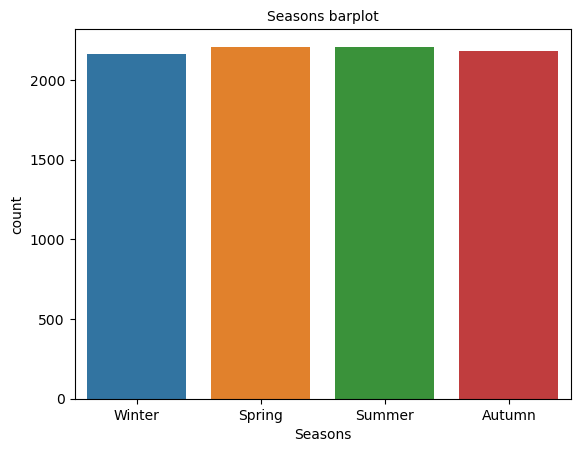

Seasons  Rented Bike Count
Autumn   0                    247
Spring   0                     48
Winter   169                   14
         103                   14
         189                   13
                             ... 
Spring   1074                   1
         1075                   1
         1078                   1
         1079                   1
Winter   937                    1
Name: count, Length: 4461, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


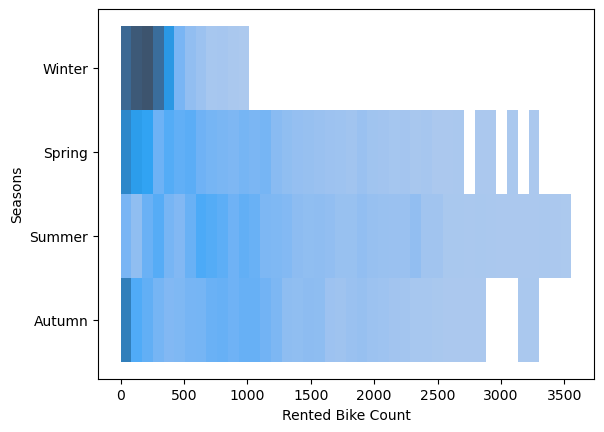

In [53]:
# Seasons
print(data['Seasons'].value_counts())
# 시각화
sns.countplot(x='Seasons', data=data)
plt.title('Seasons barplot', fontsize=10)
plt.show()
# 계절(Seasons)이 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
print(data[['Seasons','Rented Bike Count']].value_counts())
print(data.groupby('Seasons')['Rented Bike Count'])
sns.histplot(x=data['Rented Bike Count'], y=data['Seasons'])
plt.show()